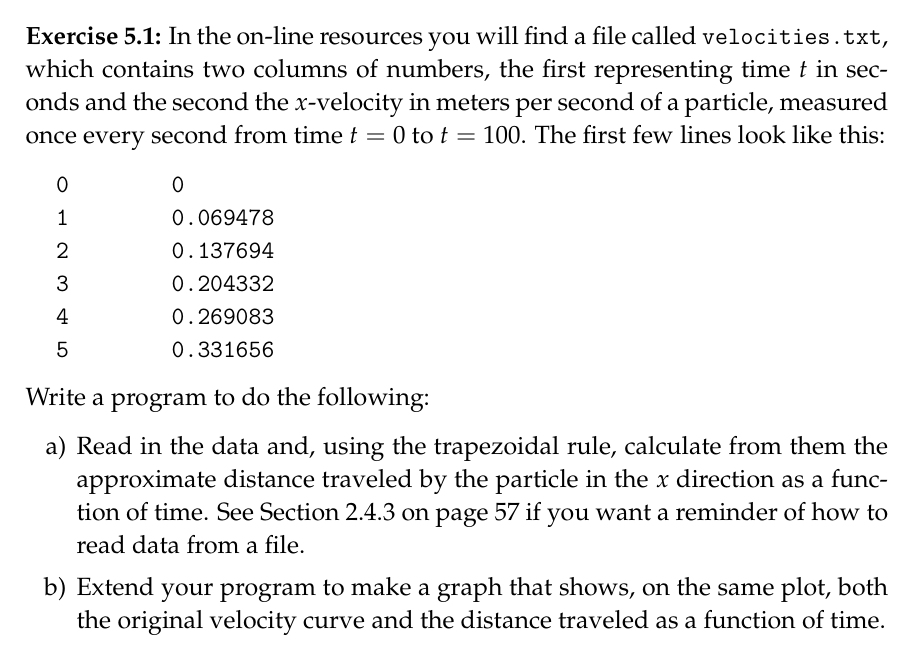

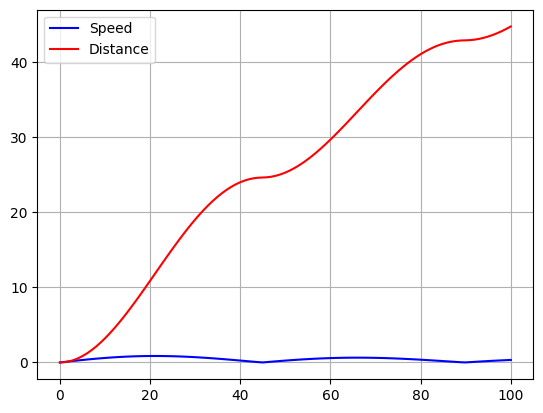

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
time,velocity=np.loadtxt('velocities.txt',unpack=True)
speed=np.abs(velocity)
distance=np.zeros_like(time)
for i in range(1,len(time)):
 distance[i]=distance[i-1]+(speed[i]+speed[i-1])*(time[i]-time[i-1])/2
plt.plot(time,speed,label='Speed',color='b')
plt.plot(time,distance,label='Distance',color='r')
plt.legend()
plt.grid()
plt.show()

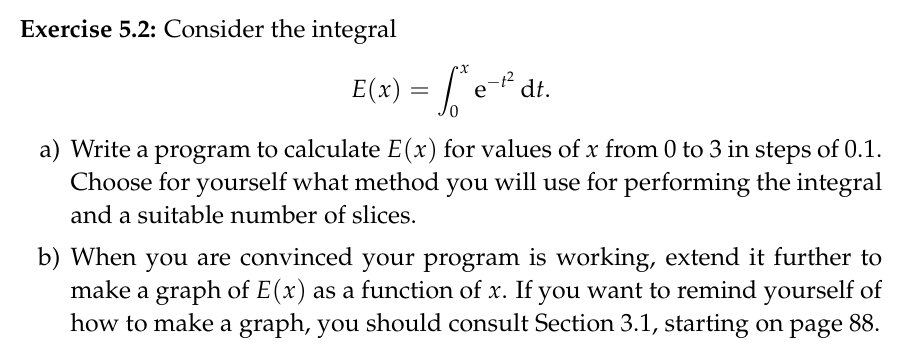

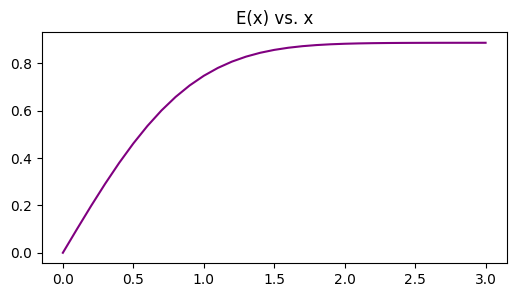

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def f(t):
  return np.exp(-t**2)
def simpsons_rule(func,a,b,N):
 if N%2==1:N+=1
 h=(b-a)/N
 x=np.linspace(a,b,N+1)
 fx=func(x)
 integral=fx[0]+fx[-1]+4*np.sum(fx[1:N:2])+2*np.sum(fx[2:N-1:2])
 return(h/3)*integral
a=0
N=1000
x_vals=np.arange(0,3.1,0.1)
area_vals=[simpsons_rule(f,0,x,N)for x in x_vals]
plt.figure(figsize=(6,3))
plt.title("E(x) vs. x")
plt.plot(x_vals,area_vals,color='purple')
plt.show()

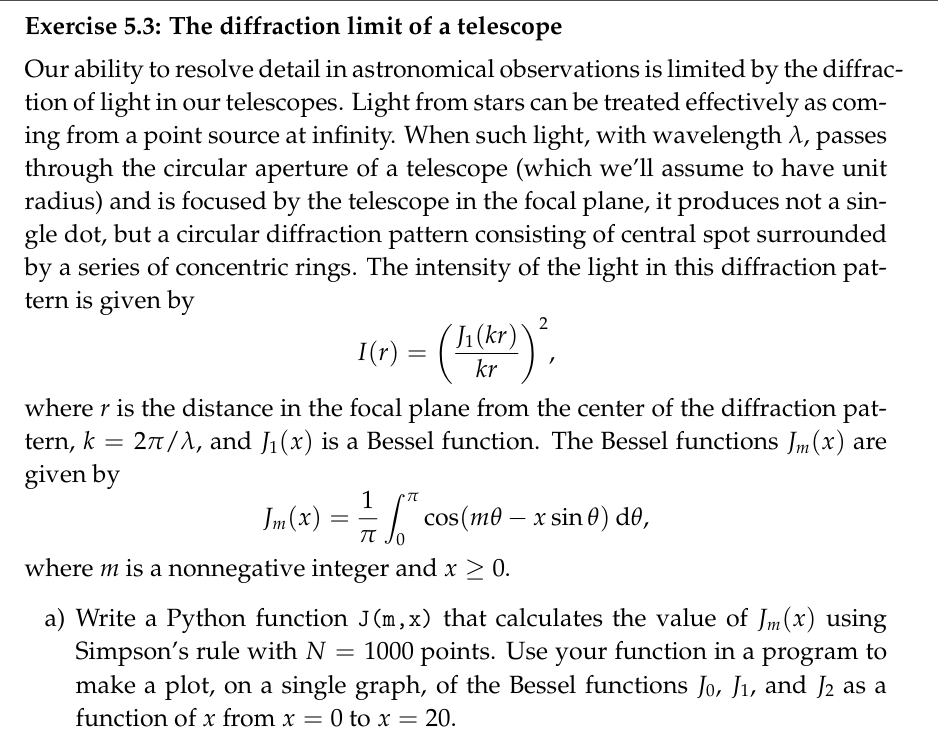

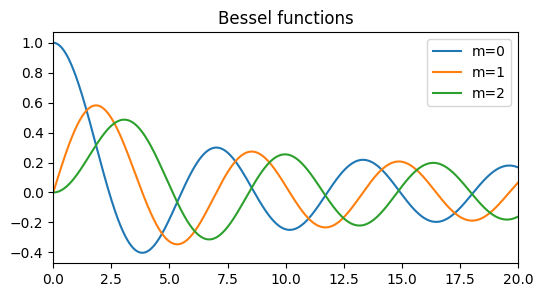

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def simpsons_rule(func,a,b,N):
 if N%2==1:N+=1
 h=(b-a)/N
 x=np.linspace(a,b,N+1)
 fx=func(x)
 integral=fx[0]+fx[-1]+4*np.sum(fx[1:N:2])+2*np.sum(fx[2:N-1:2])
 return(h/3)*integral
def f(theta,m,xval):
  return np.cos(m*theta-xval*np.sin(theta))
def J(m,xval,N):
  return(1/np.pi)*simpsons_rule(lambda theta:f(theta,m,xval),0,np.pi,N)
N=1000
x1=0
x2=20
xvals=np.linspace(x1,x2,N+1)
M=[0,1,2]
plt.figure(figsize=(6,3))
plt.title("Bessel functions")
for m in M:
 Jvals=[J(m,xval,N)for xval in xvals]
 plt.plot(xvals,Jvals,label='m='+str(m))
plt.xlim(x1,x2)
plt.legend()
plt.show()

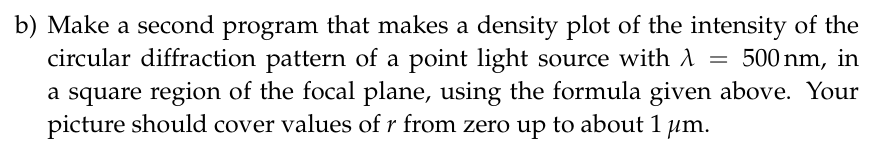

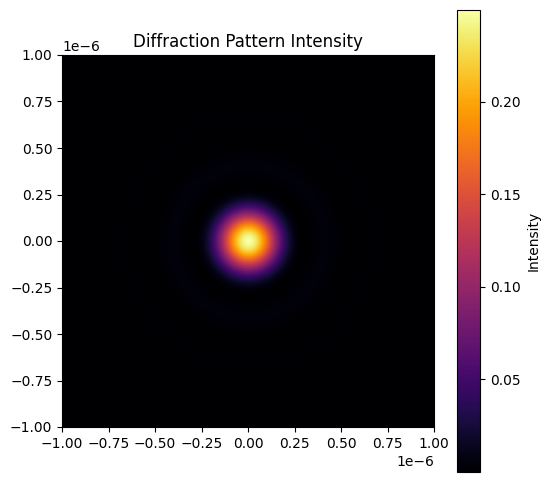

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
def simpsons_rule(func,a,b,N):
 if N%2:N+=1
 h=(b-a)/N
 x=np.linspace(a,b,N+1)
 fx=func(x)
 return(h/3)*(fx[0]+fx[-1]+4*np.sum(fx[1:N:2])+2*np.sum(fx[2:N-1:2]))
def f(theta,m,xval):return np.cos(m*theta-xval*np.sin(theta))
def J(m,xval,N):return(1/np.pi)*simpsons_rule(lambda theta:f(theta,m,xval),0,np.pi,N)
N=1000
wavelength=500e-9
k=2*np.pi/wavelength
size=200
r_max=1e-6
r=np.linspace(-r_max,r_max,size)
x,y=np.meshgrid(r,r)
radius=np.sqrt(x**2+y**2)
I=np.zeros_like(radius)
for i in range(size):
 for j in range(size):
  if radius[i,j]!=0:I[i,j]=(J(1,k*radius[i,j],N)/(k*radius[i,j]))**2
plt.figure(figsize=(6,6))
plt.title("Diffraction Pattern Intensity")
plt.imshow(I,origin='lower',extent=(-r_max,r_max,-r_max,r_max),cmap='inferno')
plt.colorbar(label="Intensity")
plt.show()


**Exercise 5.4**

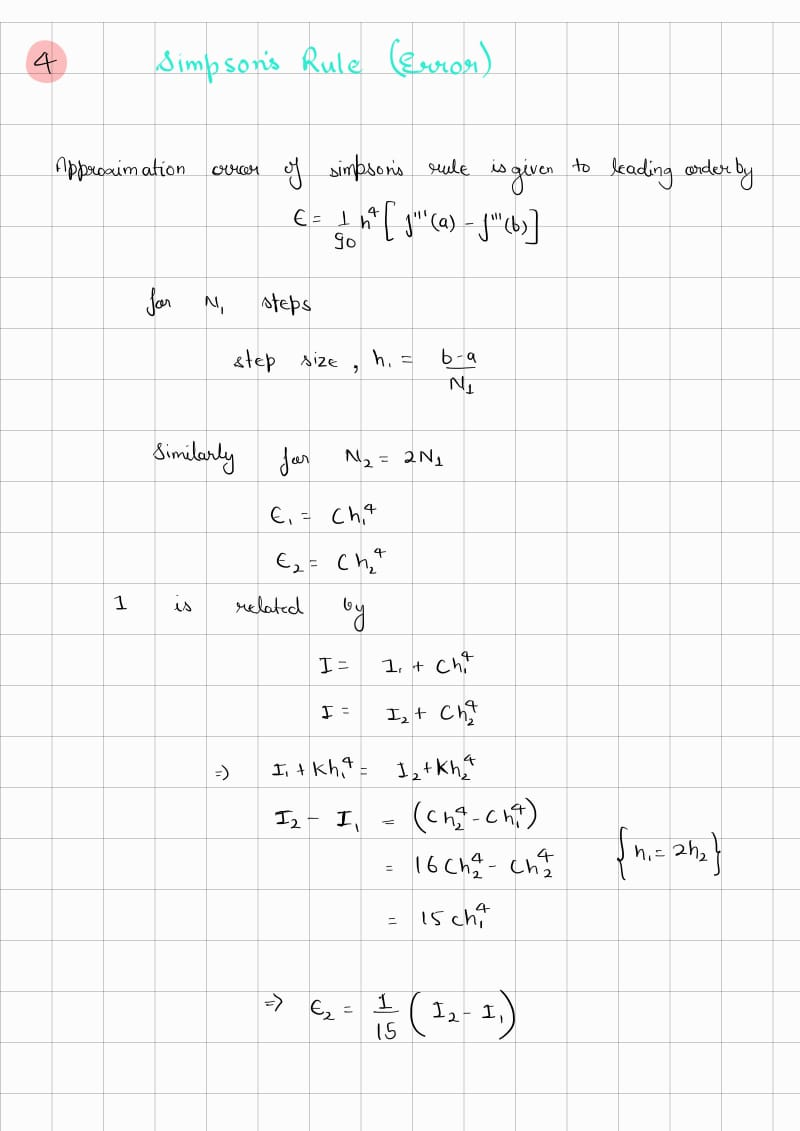

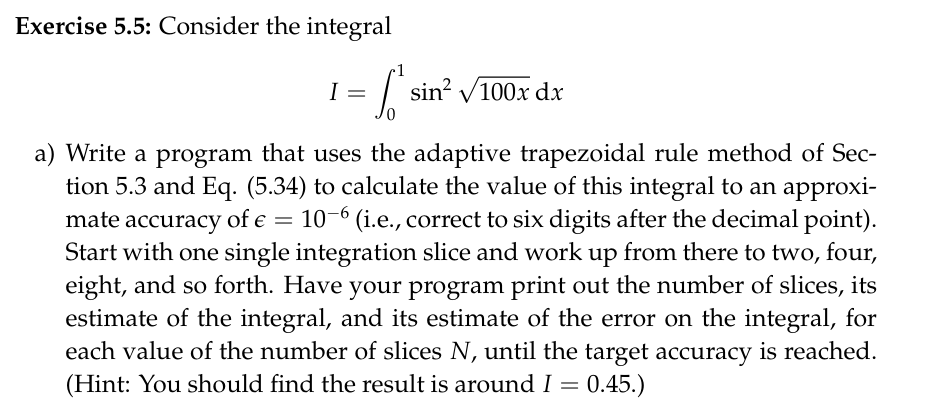

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
a,b,N,e=0,1,1,1e-6
def f(x):return(np.sin(np.sqrt(100*x)))**2
def trapezoidal_rule(func,a,b,N):
 h=(b-a)/N
 x=np.linspace(a,b,N+1)
 return(h/2)*(func(x[0])+2*np.sum(func(x[1:N]))+func(x[-1]))
def trapezoid_adapt(f,N,I0):
 I=trapezoidal_rule(f,a,b,N)
 return I,(1/3)*(I-I0)
Ivals,Evals,Nvals=[],[],[]
I0,E0=trapezoid_adapt(f,N,0)[0],1
while abs(E0)>e:
 N*=2
 I0,E0=trapezoid_adapt(f,N,I0)
 Ivals.append(I0)
 Evals.append(E0)
 Nvals.append(N)
print(f"An accuracy of 1e-6 is reached at the number of slices N = {N}")
print(f"Final computed integral value: {I0:.6f}")

An accuracy of 1e-6 is reached at the number of slices N = 4096
Final computed integral value: 0.455832


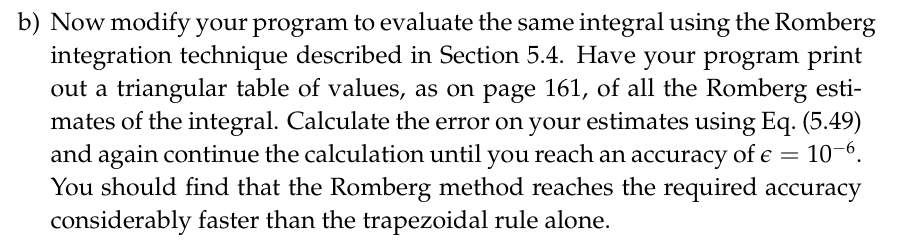

In [ ]:
def f(x):
    return np.sin(np.sqrt(100*x))**2
def trapezoid(a,b,n):
    h=(b-a)/n
    s=0.5*(f(a)+f(b))
    for i in range(1,n):
        s+=f(a+i*h)
    return h*s
def romberg_integration(a,b,err=1e-6):
    max_order=6
    rom=np.zeros((max_order,max_order))
    for i in range(max_order):
        n=2**i
        rom[i, 0]=trapezoid(a,b,n)
        if i>0 and abs(rom[i,0]-rom[i-1,0])<err:
            return rom[i,0],rom[:i+1,:i+1]
    print(f"No. of steps: {n}")
    for i in range(1,max_order):
        for j in range(i,max_order):
            rom[j,i]=(4*i*rom[j,i-1]-rom[j-1,i-1])/(4*i-1)
            if abs(rom[j,i]-rom[j-1,i])<err:
                return rom[j,i],rom[:j+1,:i+1]
    return rom[max_order-1,max_order-1],rom
result, romberg_table=romberg_integration(0, 1)
print(f"Estimated integral :{result}")
print("Romberg table:")
print(romberg_table)

No. of steps: 32
Estimated integral :0.4565633464303249
Romberg table:
[[0.14797948 0.         0.         0.         0.         0.        ]
 [0.32523191 0.38431605 0.         0.         0.         0.        ]
 [0.51228285 0.57463317 0.60182132 0.         0.         0.        ]
 [0.40299745 0.36656898 0.33684553 0.31275682 0.         0.        ]
 [0.43010337 0.43913868 0.44950578 0.45974762 0.469547   0.        ]
 [0.44841467 0.45451843 0.45671554 0.45737097 0.45721253 0.45656335]]


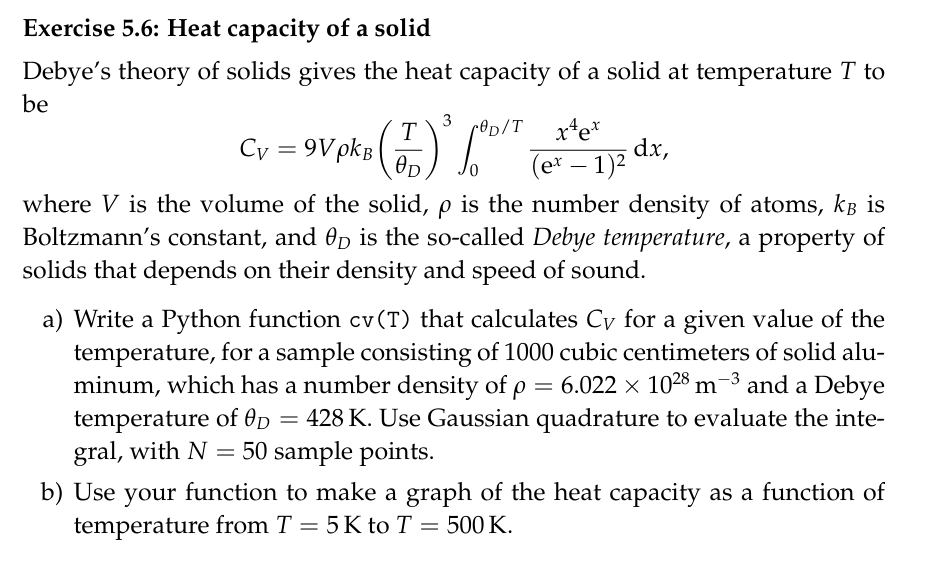

2404.1037011820094


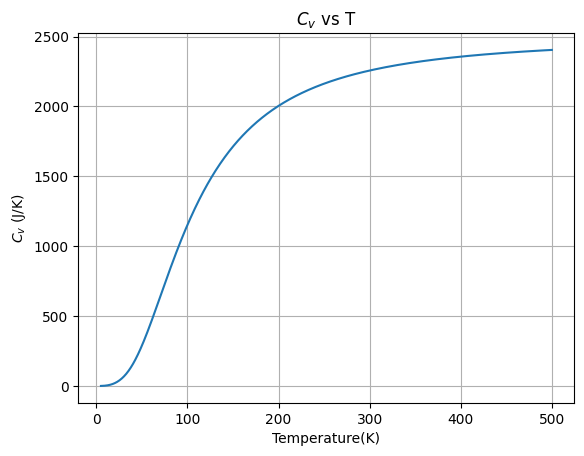

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate
N=1000
V=0.001
rho=6.022*(10**28)
K_B=1.38*(10**(-23))
theta_D=428
def f(x):
    return ((x**4)*np.exp(x))/(np.exp(x)-1)**2
def phi(X,k,x):
    p=1
    for m in range(len(X)):
        if m != k:
            p=p*(x-X[m])/(X[k]-X[m])
    return p
def Gauss(t):
    S=0 ; S1 = 0
    a = 0.01 ; b = theta_D/t
    h=((b-a)/N)
    X= np.linspace(a,b,50)
    xi = np.linspace(a,b,1001)
    w=[]
    for k in range(0,len(X)):
        y= phi(X,k,xi)
        w.append( (y[0]+ y[-1] + 4*np.sum(y[1:-1:2])+2*np.sum(y[2:-2:2]))*(h/3))
        S+= f(X[k])*w[k]
    return S
def C_v(T):
   return 9*V*rho*K_B*((T/theta_D)**3)*Gauss(T)
T=np.linspace(5,500,1000)
print(C_v(500))
final_cv = []
for i in range(len(T)):
  final_cv.append(C_v(T[i]))
plt.plot(T,final_cv)
plt.xlabel('Temperature(K)')
plt.ylabel(r'$C_v $ (J/K)')
plt.title(r'$C_v $ vs T ')
plt.grid()
plt.show()

 **Exercise 5.7: Period of an anharmonic oscillator**


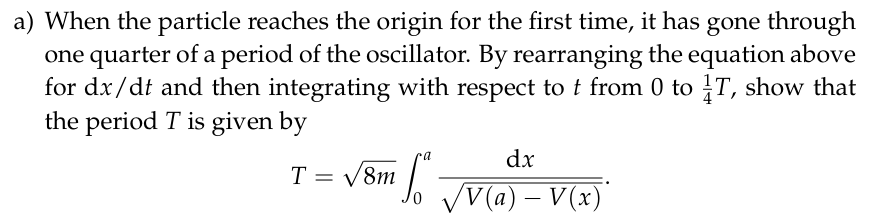

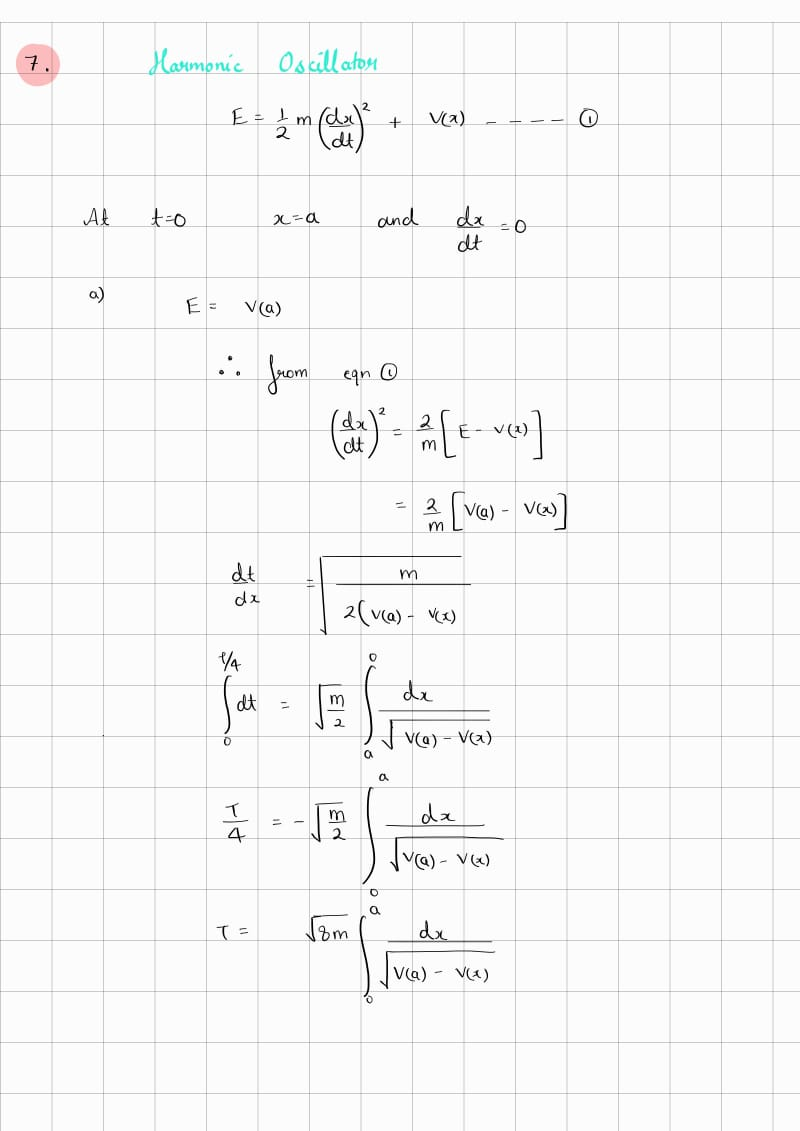

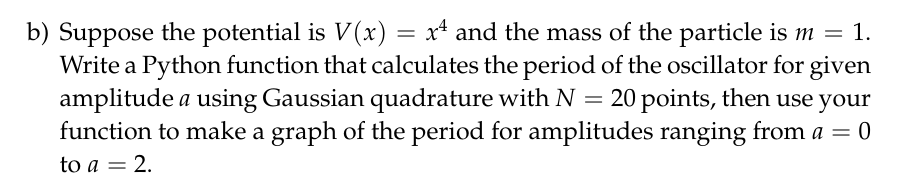

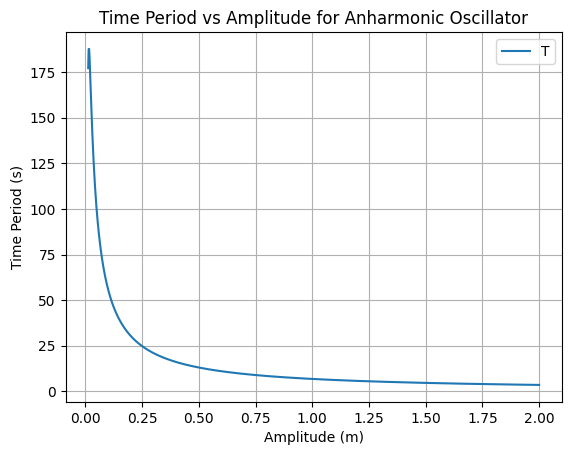

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import roots_legendre
from scipy.integrate import trapezoid
def g(x): return x**4
N = 20
points, weights = roots_legendre(N)
def Gauss(a):
    f = lambda x: 1 / np.sqrt(g(a) - g(x))
    X = (a - 0.015) * 0.5 * points + (a - 0.015) * 0.5
    return np.sum(weights * f(X)) * (a / 2) + trapezoid(f(X), X)
def T(a): return np.sqrt(8) * Gauss(a)
a = np.linspace(0.012, 2, 1000)
final_T = [T(ai) for ai in a]
plt.plot(a, final_T, label='T')
plt.xlabel('Amplitude (m)')
plt.ylabel('Time Period (s)')
plt.title('Time Period vs Amplitude for Anharmonic Oscillator')
plt.grid()
plt.legend()
plt.show()

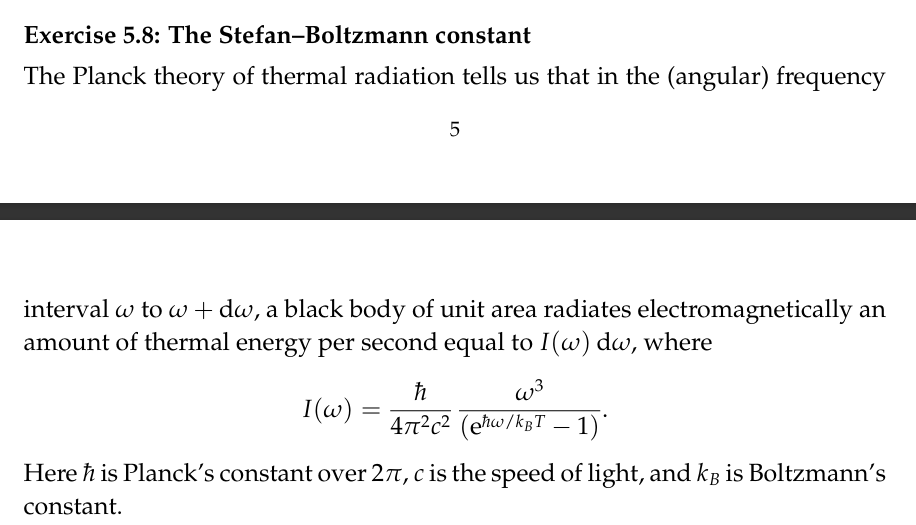

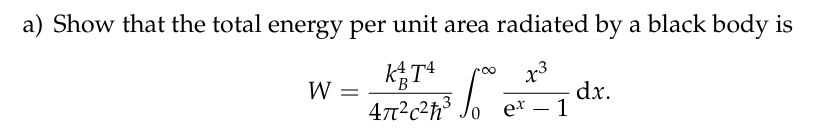

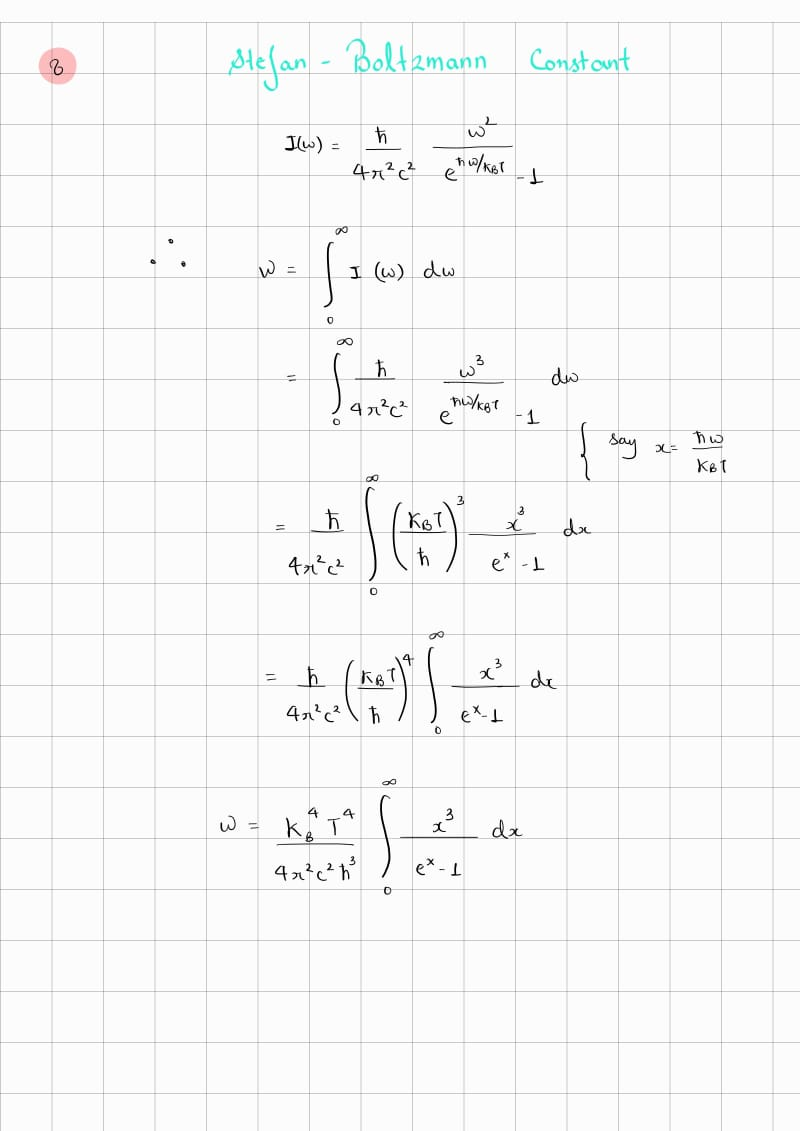

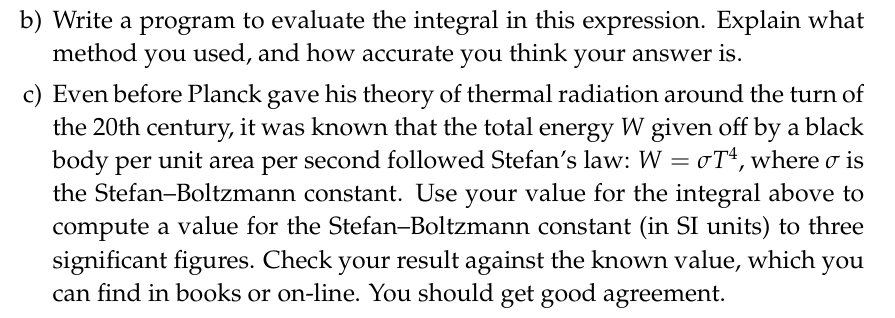

In [ ]:
import numpy as np
from scipy.special import roots_legendre
def f(x):
  return(x**3)/(np.exp(x)-1)
N=50
points,weights=roots_legendre(N)
def Gaussian(a):
 c=0.001
 X=(a-c)*0.5*points+(a+c)*0.5
 return np.sum(weights*f(X))*(a-c)/2
Num=10
while abs((Gaussian(Num)-Gaussian(Num+5))/Gaussian(Num))>1e-3:Num+=10
I=Gaussian(Num)
K_B,h_bar,c=1.38e-23,1.054e-34,3e8
sigma=(K_B**4*I)/(4*np.pi**2*h_bar**3*c**2)
print(f"Final Num:{Num}")
print(f"Integral Value:{I}")
print(f"Stefan-Boltzmann Constant:{sigma:.5e}")


Final Num:20
Integral Value:6.493920179614934
Stefan-Boltzmann Constant:5.66108e-08


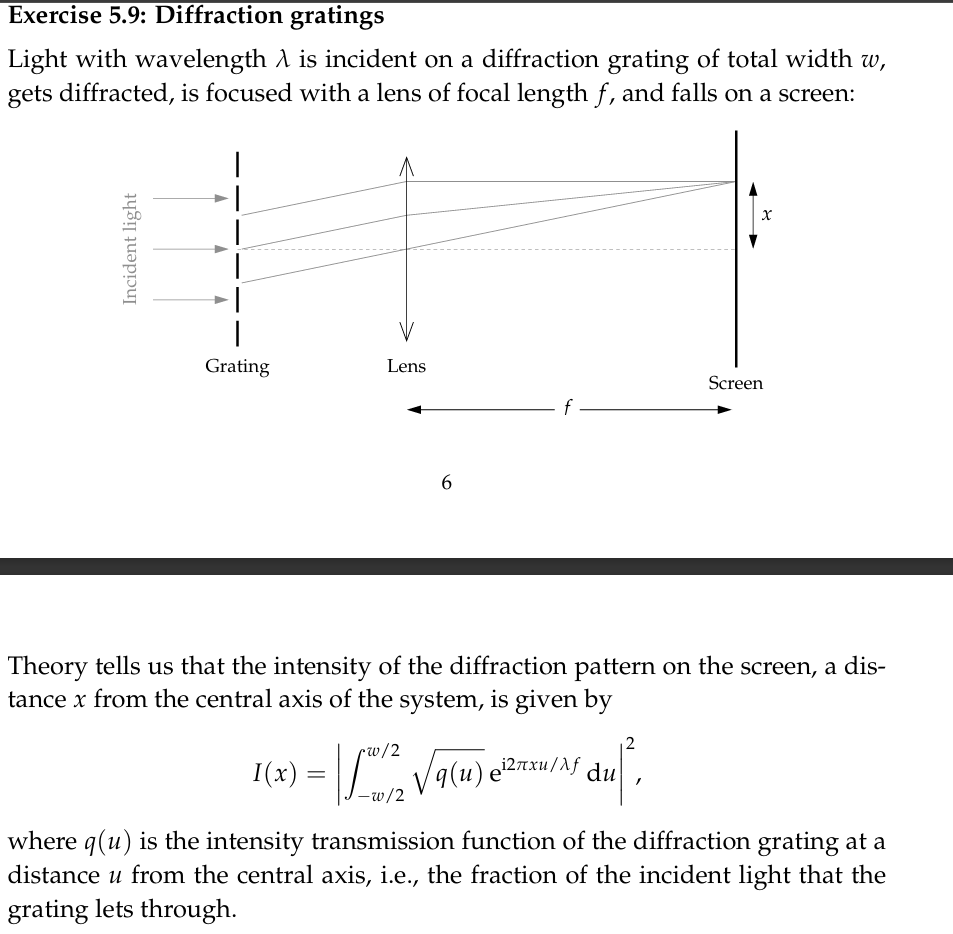

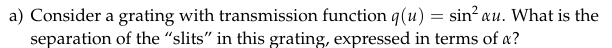

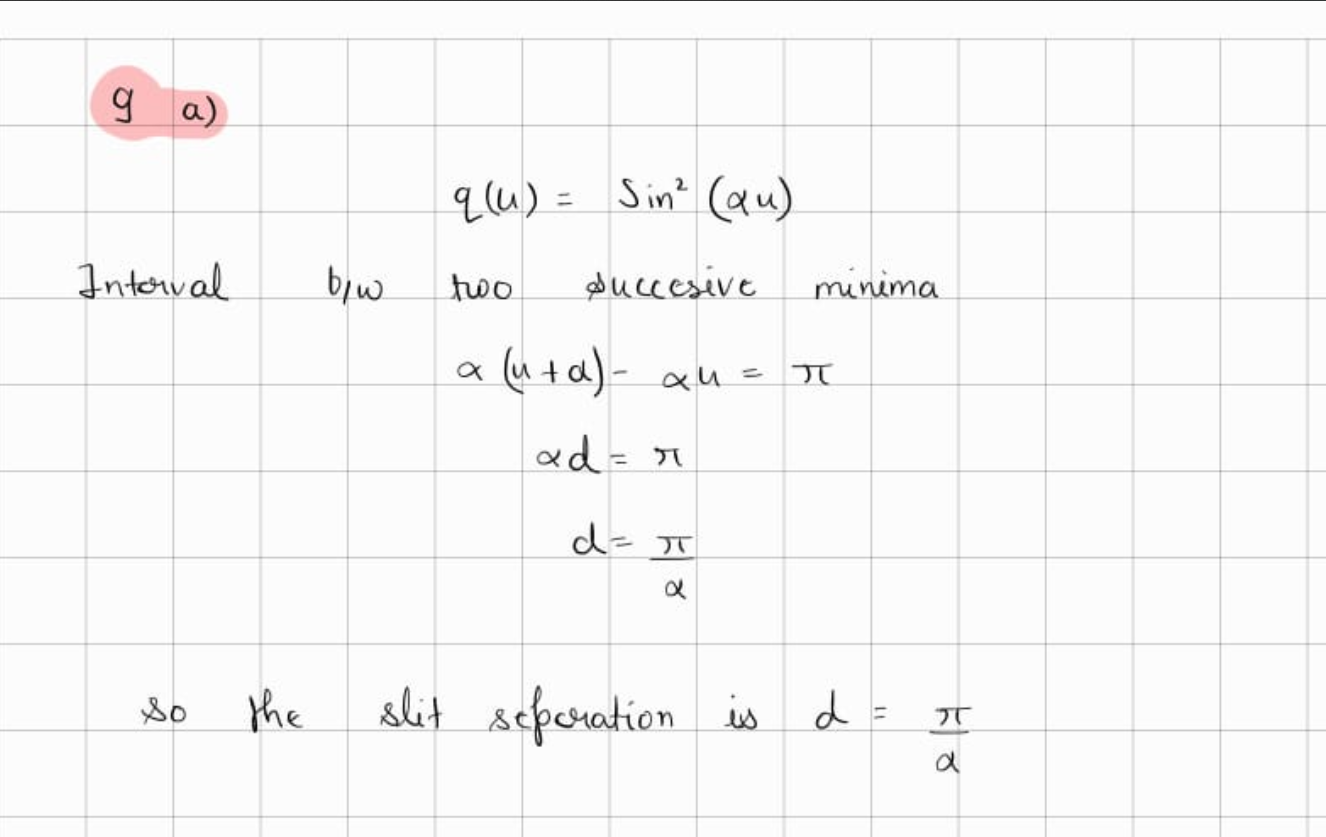

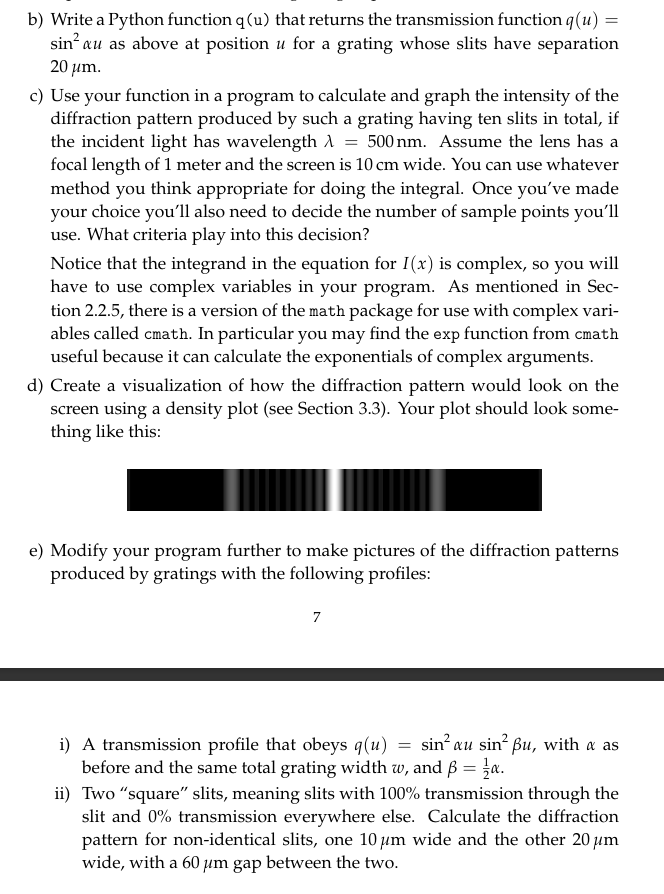

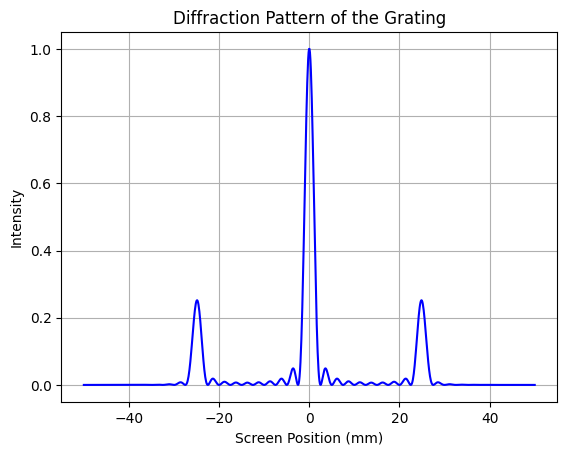

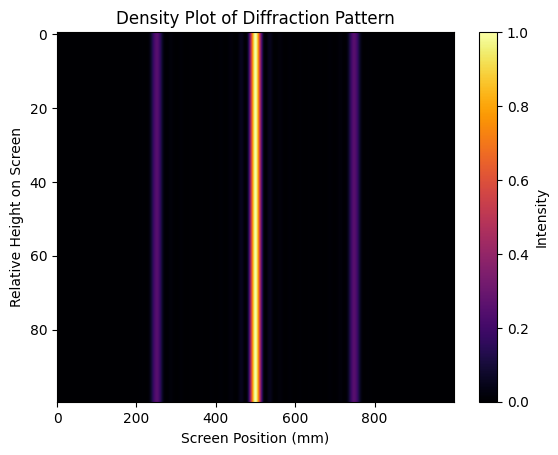

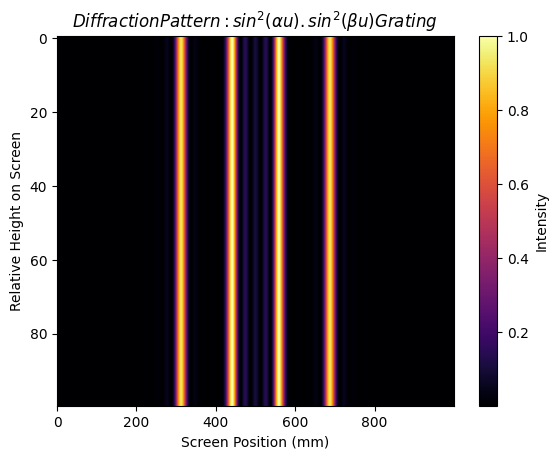

<ipython-input-11-217cbcc3cb16>:39: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral_real,_=spi.quad(lambda u:integrand(u).real,-w/2,w/2)
<ipython-input-11-217cbcc3cb16>:40: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  integral_imag,_=spi.quad(lambda u:integrand(u).imag,-w/2,w/2)


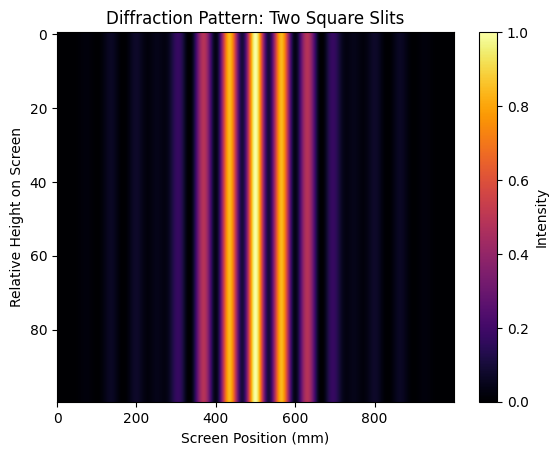

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.integrate as spi
import cmath
d,lam,f,N=20e-6,500e-9,1,10
alpha=np.pi/d
w=N*d
screen_width=0.1
num_x_points=1000
j=complex(0,1)
def q(u):return np.sin(alpha*u)**2
def I(x):
 def integrand(u):return q(u)*cmath.exp(-j*2*np.pi*x*u/(lam*f))
 integral_real,_=spi.quad(lambda u:integrand(u).real,-w/2,w/2)
 integral_imag,_=spi.quad(lambda u:integrand(u).imag,-w/2,w/2)
 return abs(complex(integral_real,integral_imag))**2
x_values=np.linspace(-screen_width/2,screen_width/2,num_x_points)
intensities=np.array([I(x) for x in x_values])
intensities/=np.max(intensities)
plt.plot(x_values*1e3,intensities,'b')
plt.xlabel("Screen Position (mm)")
plt.ylabel("Intensity")
plt.title("Diffraction Pattern of the Grating")
plt.grid()
plt.show()
plt.imshow(np.tile(intensities,(100,1)),aspect='auto',cmap="inferno")
plt.xlabel("Screen Position (mm)")
plt.ylabel("Relative Height on Screen")
plt.title("Density Plot of Diffraction Pattern")
plt.colorbar(label='Intensity')
plt.show()
def q_modified(u):
 beta=alpha/2
 return np.sin(alpha*u)*2*np.sin(beta*u)*2
def q_square_slits(u):return 1 if -40e-6<=u<=-30e-6 or 30e-6<=u<=50e-6 else 0
def plot_diffraction(q_func,title):
 def I_modified(x):
  def integrand(u):return q_func(u)*cmath.exp(-j*2*np.pi*x*u/(lam*f))
  integral_real,_=spi.quad(lambda u:integrand(u).real,-w/2,w/2)
  integral_imag,_=spi.quad(lambda u:integrand(u).imag,-w/2,w/2)
  return abs(complex(integral_real,integral_imag))**2
 intensities=np.array([I_modified(x) for x in x_values])
 intensities/=np.max(intensities)
 plt.imshow(np.tile(intensities,(100,1)),aspect='auto',cmap="inferno")
 plt.xlabel("Screen Position (mm)")
 plt.ylabel("Relative Height on Screen")
 plt.title(title)
 plt.colorbar(label='Intensity')
 plt.show()
plot_diffraction(q_modified,r'$ Diffraction Pattern: sin^2(αu).sin^2(βu) Grating $')
plot_diffraction(q_square_slits,r'Diffraction Pattern: Two Square Slits')

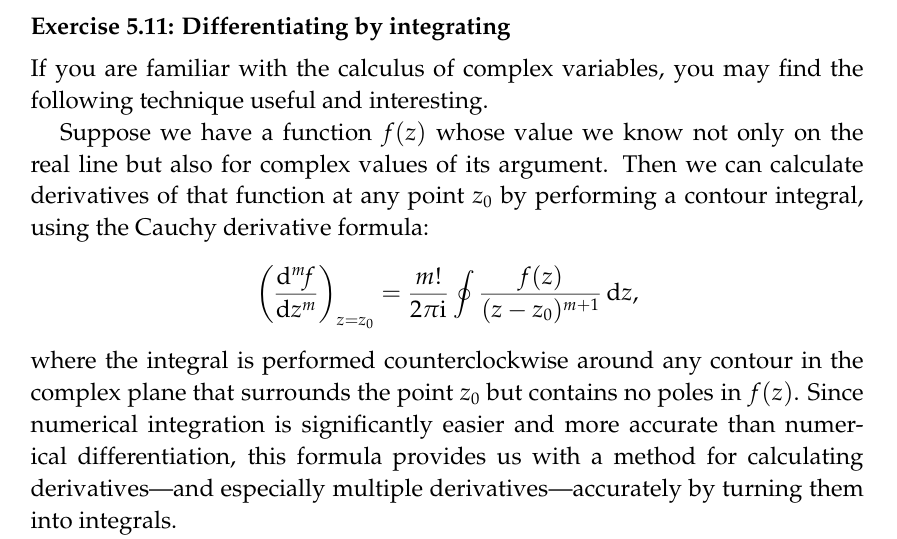

In [ ]:
import numpy as np
import math
import matplotlib.pyplot as plt
import cmath as cm
def f(z):return cm.exp(2*z)
def df_dz(m):
 N=10000
 Z=[cm.exp(1j*2*np.pi*k/N) for k in range(N+1)]
 return sum((math.factorial(m)/N)*f(Z[n])*cm.exp(-1j*2*np.pi*n*m/N) for n in range(N))
Derivatives=[df_dz(i) for i in range(1,21)]
for i,d in enumerate(Derivatives,1):
 print(rf' The derivative of {i:2}th is {d}')


 The derivative of  1th is (1.9999999999999982+1.0497649892236968e-16j)
 The derivative of  2th is (3.9999999999999916+4.65023205624979e-17j)
 The derivative of  3th is (7.999999999999979-8.067988822597211e-17j)
 The derivative of  4th is (15.999999999999982+2.8267861142128314e-16j)
 The derivative of  5th is (31.999999999999947+7.769392768031125e-16j)
 The derivative of  6th is (63.999999999999254-1.490895081002197e-13j)
 The derivative of  7th is (127.99999999999892-1.943480099075856e-12j)
 The derivative of  8th is (255.9999999999777-3.84405007824995e-12j)
 The derivative of  9th is (511.9999999999246+1.2955236883271937e-10j)
 The derivative of 10th is (1023.9999999993406+3.0384228466573404e-10j)
 The derivative of 11th is (2047.9999999836873+2.395950104983058e-09j)
 The derivative of 12th is (4095.9999999965657+1.2969394447281957e-09j)
 The derivative of 13th is (8191.999995954335+2.4983783077914268e-06j)
 The derivative of 14th is (16383.999947935343-3.055034903809428e-05j)
 The d